In [1]:
import requests
import apimoex # pip install apimoex

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.dates as mdates

%matplotlib inline

Сравнение объёмов по дням недели

In [2]:
def to_date(string):
    yyyy = int(string[0:4])
    mm = int(string[5:7])
    dd = int(string[8:10])
    return datetime.date(yyyy, mm, dd)

In [3]:
def get_week_persent_analysis(start_date):
    #start_date = to_date(start_date)
    end_date = start_date + datetime.timedelta(days=4)
    # print(start_date, end_date)
    candles = apimoex.get_market_candles(requests.Session(), 'SBER', 24, start=str(start_date), end=str(end_date))
    volume_sum = 0
    for i in range(len(candles)):
        volume_sum += candles[i]['value']
    volume_persent = []
    for i in range(len(candles)):
        volume_persent.append(candles[i]['value'] / volume_sum)
    # print(volume_persent)
    return volume_persent

volume = get_week_persent_analysis(to_date('2023-01-16'))
print(volume)

[0.1663621651397099, 0.2686669386209044, 0.21498942177393757, 0.21063489789225043, 0.13934657657319785]


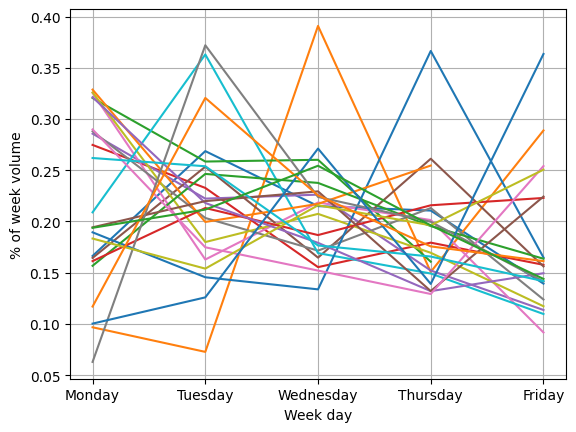

In [4]:
fig, ax = plt.subplots()
for i in range(23):
    plt.plot(get_week_persent_analysis(to_date('2023-01-16') - datetime.timedelta(days=7*i)))
plt.grid()
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
ax.set_xlabel('Week day')
ax.set_ylabel('% of week volume')
plt.show()

[0.19973183965425076, 0.21142916789329386, 0.20780811031733995, 0.20693646674255134, 0.16809441539256403]


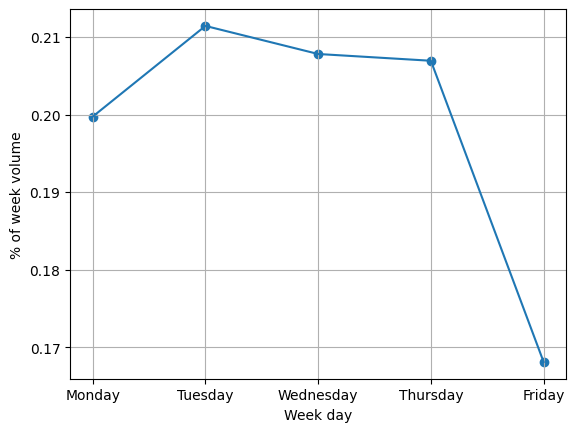

In [5]:
n_weeks = 500
pers_weeks = [0, 0, 0, 0, 0]
for i in range(n_weeks):
    volums = get_week_persent_analysis(to_date('2023-01-16') - datetime.timedelta(days=7*i))
    for j in range(len(volums)):
        pers_weeks[j] += volums[j]
    # print(pers_weeks)
for j in range(len(pers_weeks)):
    pers_weeks[j] /= n_weeks
print(pers_weeks)

fig, ax = plt.subplots()
plt.plot(pers_weeks)
plt.scatter([0, 1, 2, 3, 4], pers_weeks)
plt.grid()
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
ax.set_xlabel('Week day')
ax.set_ylabel('% of week volume')
plt.show()

In [ ]:
index = pd.date_range(start = start_date, end = end_date, freq = "D")
index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]
data = np.array(volume_persent)
df = pd.DataFrame(data=data,index=index, columns=['volume_persent'])
df['weekday'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
print(df.head())

ax = df.plot(x='weekday', y = 'volume_persent')
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# plt.gcf().autofmt_xdate()
plt.show()

In [2]:
apimoex.get_market_candles(requests.Session(), 'SBER', 24)[-1]

{'begin': '2023-01-25 00:00:00',
 'open': 152.45,
 'close': 152.81,
 'high': 153.6,
 'low': 151.5,
 'value': 6613609683.1}

In [46]:
# apimoex.get_market_candle_borders(requests.Session(), 'SBER') 
apimoex.get_market_candles(requests.Session(), 'SBER', 1, start='2023-01-25', end='2023-01-25')[-1]

{'begin': '2023-01-25 19:40:00',
 'open': 152.28,
 'close': 152.29,
 'high': 152.29,
 'low': 152.28,
 'value': 70050.1}

In [47]:
request_url = ('https://iss.moex.com/iss/engines/stock/'
               'markets/shares/boards/TQBR/securities.json')
arguments = {'securities.columns': ('SECID,'
                                    'REGNUMBER,'
                                    'LOTSIZE,'
                                    'SHORTNAME')}
with requests.Session() as session:
    iss = apimoex.ISSClient(session, request_url, arguments)
    data = iss.get()
    df = pd.DataFrame(data['securities'])
    df.set_index('SECID', inplace=True)
    print(df.head(), '\n')
    print(df.tail(), '\n')
    df.info()

          REGNUMBER  LOTSIZE   SHORTNAME
SECID                                   
ABRD   1-02-12500-A       10  АбрауДюрсо
ACKO   1-01-52065-Z      100     АСКО ао
AFKS   1-05-01669-A      100  Система ао
AFLT   1-01-00010-A       10    Аэрофлот
AGRO           None        1    AGRO-гдр 

          REGNUMBER  LOTSIZE   SHORTNAME
SECID                                   
YNDX           None        1  Yandex clA
YRSB   1-01-50099-A       10     ТНСэнЯр
YRSBP  2-01-50099-A       10   ТНСэнЯр-п
ZILL   1-02-00036-A        1      ЗИЛ ао
ZVEZ   1-01-00169-D     1000   ЗВЕЗДА ао 

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, ABRD to ZVEZ
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   REGNUMBER  227 non-null    object
 1   LOTSIZE    246 non-null    int64 
 2   SHORTNAME  246 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.7+ KB


In [30]:
df.head(60)

,REGNUMBER,LOTSIZE,SHORTNAME
SECID,,,
ABRD,1-02-12500-A,10,АбрауДюрсо
ACKO,1-01-52065-Z,100,АСКО ао
AFKS,1-05-01669-A,100,Система ао
AFLT,1-01-00010-A,10,Аэрофлот
AGRO,None,1,AGRO-гдр
AKRN,1-03-00207-A,1,Акрон
ALRS,1-03-40046-N,10,АЛРОСА ао
AMEZ,1-03-45219-D,100,АшинскийМЗ
APTK,1-01-07335-A,10,Аптеки36и6
